In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [3]:
trainingSet = pd.read_csv('data/training.csv')  # read the data
testingSet = pd.read_csv('data/testing.csv')  # read the data

In [4]:
# print(trainingSet.head(10))  # displays the first 5 elements in training data
# print(testingSet.head(10))  # displays the first 5 elements in testing data

In [5]:
# training data
X_train = trainingSet.iloc[:, :-1]  # X_train contains the features only without the class
y_train = trainingSet.iloc[:, -1]  # Y_train contains the class only without the features

In [6]:
# testing data
X_test = testingSet.iloc[:, :-1]  # X_test contains the features only without the class
y_test = testingSet.iloc[:, -1]  # Y_test contains the class only without the features

In [7]:
# print(trainingSet.head(5))  # displays the first 5 elements in training data
# print(X_train.head(5))  # displays the features of first 5 elements in training data
# print(y_train.head(5))  # displays the class of first 5 elements in training data

In [8]:
# print(testingSet.head(5))  # displays the first 5 elements in testing data
# print(X_test.head(5))  # displays the features of first 5 elements in testing data
# print(y_test.head(5))  # displays the class of first 5 elements in testing data

In [9]:
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

In [10]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
# print(type(y_test))

In [12]:
X_Ktrain = []
y_Ktrain = []
k = 4
step = len(X_train)/k
step = np.ceil(step)
step = int(step)
for i in range(0,len(X_train),step):
    X_Ktrain.append(X_train[i:i+step])
    y_Ktrain.append(y_train[i:i+step])
    
# print(type(X_train))
# print(type(y_train))
# print(type(y_Ktrain[0]))
# print(type(X_Ktrain[0]))

## Cross validation range(1,5000) with step 1000

In [22]:
error = []
for i in range(1,5000,1000):
    for j in range(1,len(X_Ktrain)):
        err1 = 0
        for m in range(1,len(X_Ktrain)):
            if m == j:
                continue
            ada = AdaBoostClassifier(n_estimators=i)
            ada.fit(X_Ktrain[m], y_Ktrain[m])
            y_true = y_Ktrain[j]
            y_pred = ada.predict(X_Ktrain[j])
            err = mean_squared_error(y_true, y_pred)
            err1 = err1 + err
    error.append(err1)
    print('k = ', i, 'err = ', err1)
    print("######################################\n")
        
print(error)

k =  1 err =  2.1990602306706535
######################################

k =  1001 err =  1.5600170867150789
######################################

k =  2001 err =  1.6146945749679624
######################################

k =  3001 err =  1.686458778299872
######################################

k =  4001 err =  1.6847501067919692
######################################

[2.1990602306706535, 1.5600170867150789, 1.6146945749679624, 1.686458778299872, 1.6847501067919692]


Text(0, 0.5, 'Mean_Squared_Error')

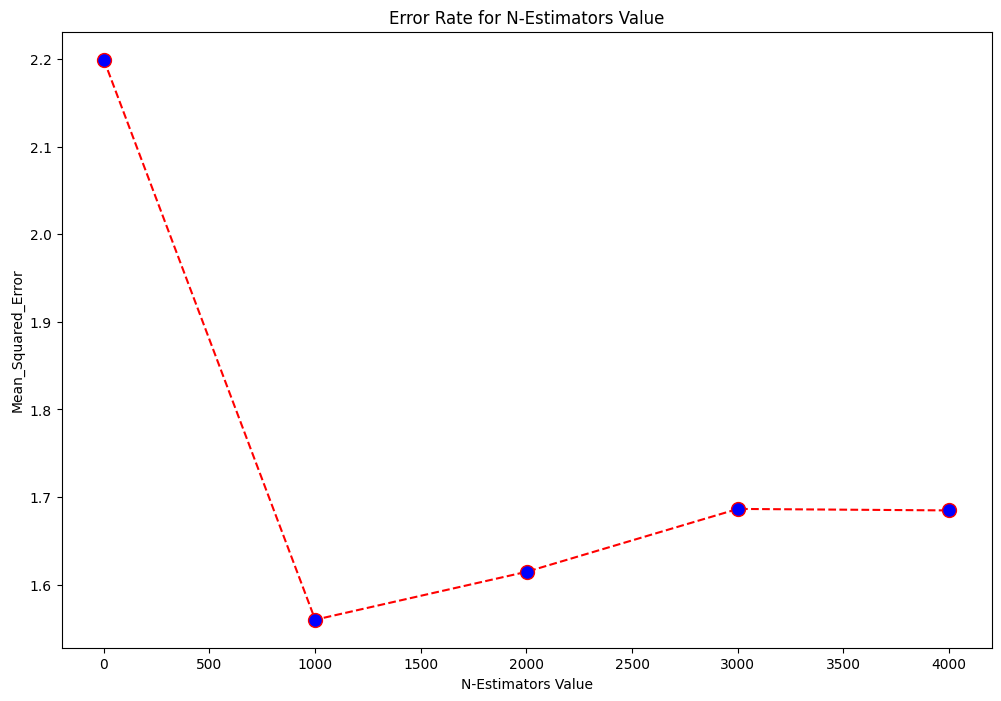

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(1,5000,1000), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for N-Estimators Value')
plt.xlabel('N-Estimators Value')
plt.ylabel('Mean_Squared_Error')

## Cross validation range(1,1000) with step 30

In [18]:
error = []
for i in range(1,1000,30):
    for j in range(1,len(X_Ktrain)):
        err1 = 0
        for m in range(1,len(X_Ktrain)):
            if m == j:
                continue
            ada = AdaBoostClassifier(n_estimators=i)
            ada.fit(X_Ktrain[m], y_Ktrain[m])
            y_true = y_Ktrain[j]
            y_pred = ada.predict(X_Ktrain[j])
            err = mean_squared_error(y_true, y_pred)
            err1 = err1 + err
    error.append(err1)
    print('k = ', i, 'err = ', err1)
    print("######################################\n")
        
print(error)

k =  1 err =  2.1990602306706535
######################################

k =  31 err =  1.6454506621102092
######################################

k =  61 err =  1.5634344297308842
######################################

k =  91 err =  1.5531824006834687
######################################

k =  121 err =  1.5309696710807348
######################################

k =  151 err =  1.5224263135412217
######################################

k =  181 err =  1.5309696710807348
######################################

k =  211 err =  1.5463477146518583
######################################

k =  241 err =  1.5378043571123452
######################################

k =  271 err =  1.5429303716360532
######################################

k =  301 err =  1.5224263135412217
######################################

k =  331 err =  1.5412217001281503
######################################

k =  361 err =  1.5309696710807348
######################################

k =  391 err =  1.532678342588

Text(0, 0.5, 'Mean_Squared_Error')

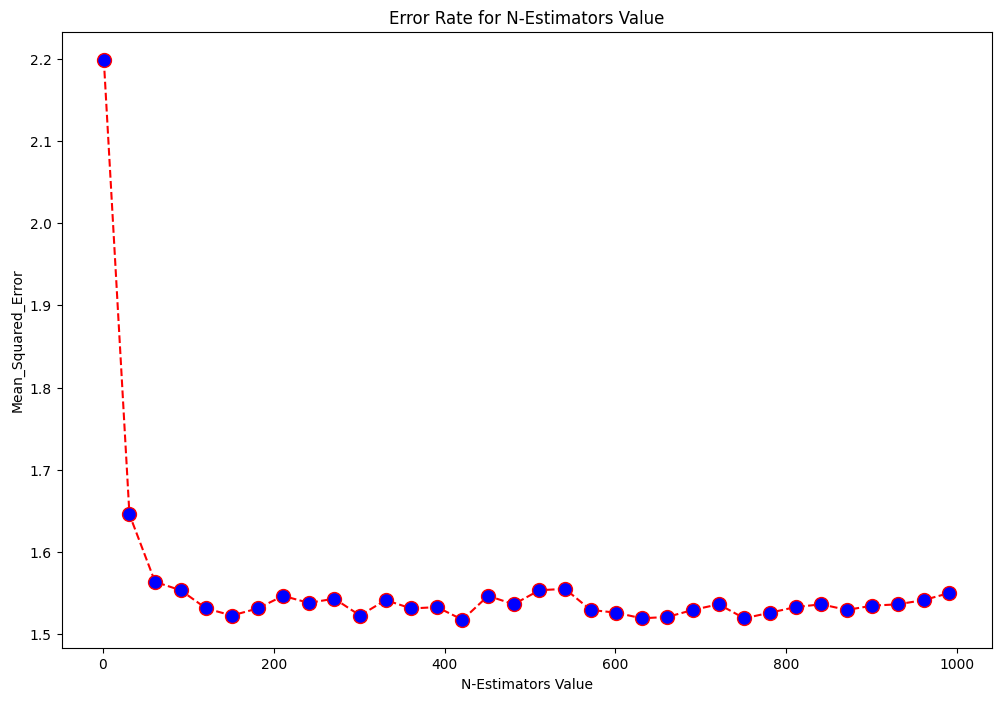

In [20]:
plt.figure(figsize=(12,8))
plt.plot(range(1,1000,30), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for N-Estimators Value')
plt.xlabel('N-Estimators Value')
plt.ylabel('Mean_Squared_Error')

## Cross validation range(100,500) with step 20

In [13]:
error = []
for i in range(100,500,20):
    for j in range(1,len(X_Ktrain)):
        err1 = 0
        for m in range(1,len(X_Ktrain)):
            if m == j:
                continue
            ada = AdaBoostClassifier(n_estimators=i)
            ada.fit(X_Ktrain[m], y_Ktrain[m])
            y_true = y_Ktrain[j]
            y_pred = ada.predict(X_Ktrain[j])
            err = mean_squared_error(y_true, y_pred)
            err1 = err1 + err
    error.append(err1)
    print('n_est = ', i, 'err = ', err1)
    print("######################################\n")
        
print(error)

n_est =  100 err =  1.5531824006834687
######################################

n_est =  120 err =  1.5326783425886372
######################################

n_est =  140 err =  1.525843656557027
######################################

n_est =  160 err =  1.5053395984621956
######################################

n_est =  180 err =  1.5395130286202479
######################################

n_est =  200 err =  1.5497650576676634
######################################

n_est =  220 err =  1.5446390431439556
######################################

n_est =  240 err =  1.5463477146518583
######################################

n_est =  260 err =  1.5360956856044425
######################################

n_est =  280 err =  1.5412217001281503
######################################

n_est =  300 err =  1.5275523280649295
######################################

n_est =  320 err =  1.5343870140965399
######################################

n_est =  340 err =  1.5548910721913711
##############

Text(0, 0.5, 'Mean_Squared_Error')

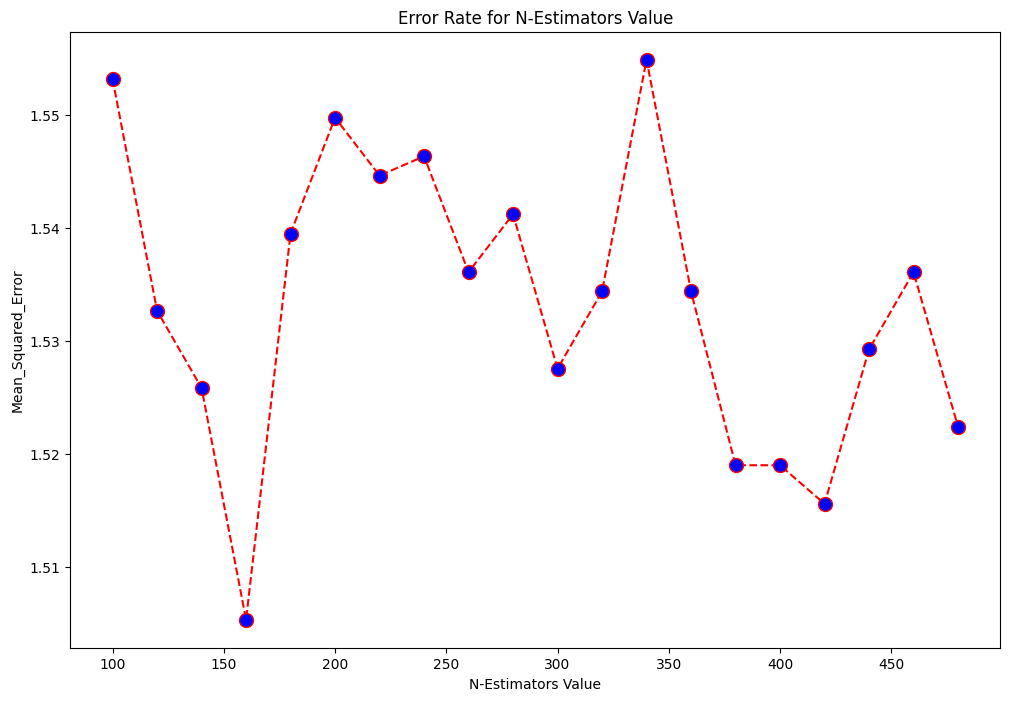

In [14]:
plt.figure(figsize=(12,8))
plt.plot(range(100,500,20), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for N-Estimators Value')
plt.xlabel('N-Estimators Value')
plt.ylabel('Mean_Squared_Error')

In [15]:
minErr = min(error)
min_index = error.index(minErr)
n_est = 100 + 20*min_index
print(n_est, error[min_index])

160 1.5053395984621956


In [16]:
ada = AdaBoostClassifier(n_estimators=n_est)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=160)

In [17]:
y_pred = ada.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.81      0.83      0.82      2006
           1       0.82      0.81      0.81      2006

    accuracy                           0.82      4012
   macro avg       0.82      0.82      0.82      4012
weighted avg       0.82      0.82      0.82      4012



In [25]:
labels = ['h','g']
columns = [f'Predicted {label}' for label in labels]
index = [f'Actual {label}' for label in labels]
table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                     columns=columns, index=index)

table

,Predicted h,Predicted g
Actual h,1656,350
Actual g,389,1617


In [26]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('model_accuracy = ', acc)
print('model_precision = ', prec)
print('model_recall = ', recall)
print('model_f1 = ', f1)

model_accuracy =  0.81580259222333
model_precision =  0.8220640569395018
model_recall =  0.8060817547357926
model_f1 =  0.8139944626227031
